<a href="https://colab.research.google.com/github/Akalbir17/Disaster_Detection/blob/main/VGG16_Disaster_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disaster Classification Using VGG-16 Model 

### Importing all the necessary dependencies

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras import Model
from collections import deque
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageFile
import numpy as np
from google.colab import files
from keras.preprocessing import image
import tensorflow as tf


In [ ]:
%tensorflow_version 2.x

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Making use of VGG-16 model which is trained on the ImageNet Dataset having more than 14 Million images which belong to more than 1000 classes.


In [ ]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(256, 256, 3)))

for layer in baseModel.layers:
  layer.trainable = False

baseModel.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

VGG-16 Architecture

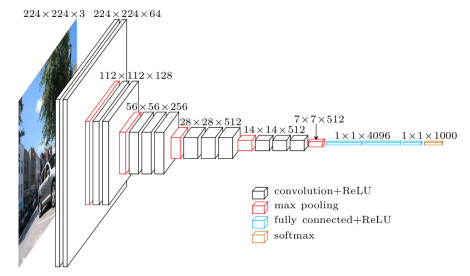


Placing the Head model over the VGG16 to extract required features

In [ ]:
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
headModel = Dense(12, activation="softmax")(headModel)

model = Model( baseModel.input, headModel) 

model.compile(optimizer = Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


Peforming Data Augmentation to avoid overfitting 

In [ ]:
train_dir = '/content/drive/MyDrive/SCAAI_Drive_Akalbir Singh Chadha_PS3/training'
val_dir = '/content/drive/MyDrive/SCAAI_Drive_Akalbir Singh Chadha_PS3/validation'

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 50,
                                                    class_mode = 'categorical', 
                                                    target_size = (256, 256))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( val_dir,
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical', 
                                                          target_size = (256, 256))

Found 9484 images belonging to 12 classes.
Found 4061 images belonging to 12 classes.


In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10,
            epochs = 48,
            validation_steps = 25,
            verbose = 1)


Epoch 1/48
10/10 [==============================] - 401s 42s/step - loss: 1.1678 - accuracy: 0.6653 - val_loss: 0.7973 - val_accuracy: 0.7525
Epoch 2/48
10/10 [==============================] - 396s 42s/step - loss: 1.0561 - accuracy: 0.6674 - val_loss: 0.8109 - val_accuracy: 0.7513
Epoch 3/48
10/10 [==============================] - 334s 35s/step - loss: 0.8997 - accuracy: 0.7180 - val_loss: 0.7438 - val_accuracy: 0.7800
Epoch 4/48
10/10 [==============================] - 288s 30s/step - loss: 0.9312 - accuracy: 0.7180 - val_loss: 0.6879 - val_accuracy: 0.7875
Epoch 5/48
10/10 [==============================] - 259s 27s/step - loss: 0.9085 - accuracy: 0.6920 - val_loss: 0.6358 - val_accuracy: 0.7925
Epoch 6/48
10/10 [==============================] - 247s 26s/step - loss: 0.8948 - accuracy: 0.6960 - val_loss: 0.6505 - val_accuracy: 0.7975
Epoch 7/48
10/10 [==============================] - 223s 23s/step - loss: 0.8576 - accuracy: 0.7340 - val_loss: 0.6257 - val_accuracy: 0.7987
Epoch 

# Saving the model to avoid overhead and repeated runing

In [ ]:
model.save('/content/drive/MyDrive/SCAAI_Drive_Akalbir Singh Chadha_PS3/VGG-16 Model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SCAAI_Drive_Akalbir Singh Chadha_PS3/VGG-16 Model/assets


In [ ]:
vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/SCAAI_Drive_Akalbir Singh Chadha_PS3/VGG-16 Model')
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

# Visualizing the Output

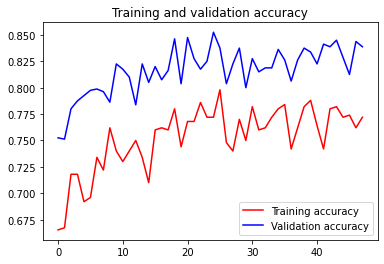

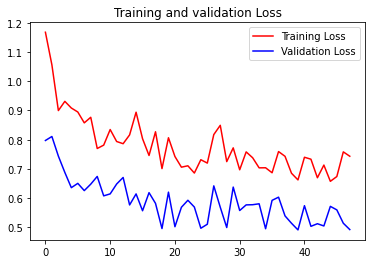

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Testing Section
Upload an image of your choice to classify the disaster


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = new_model.predict(images, batch_size=10)
  print('Probability of Damaged Infrastructure, Drought, Earthquake, Human Damage, Land Slide, Non Damage Buildings,  Non Damage Wild forest, Non Damage Human, Non Damage Sea, Urban Fire, Water Disaster, Wild Fire ')
  print(classes[0])